In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('cnet_2019.csv')
df.columns

Index(['title', 'link', 'published_date'], dtype='object')

In [3]:
df.head()

,title,link,published_date
0,New Year's resolution: Protect your credential...,https://www.cnet.com/how-to/new-years-resoluti...,2019-12-31
1,US Army bans TikTok app from government phones,https://www.cnet.com/news/us-army-bans-tiktok-...,2019-12-31
2,Aston Martin and Gentex developing tri-camera ...,https://www.cnet.com/roadshow/news/aston-marti...,2019-12-31
3,Former MythBuster shows how to pop the cork wi...,https://www.cnet.com/news/former-mythbuster-ka...,2019-12-31
4,Huawei boosted phone sales this year but expec...,https://www.cnet.com/news/huawei-grew-phone-sa...,2019-12-31


In [4]:
df['published_date'] = pd.to_datetime(df.published_date, format='%Y-%m-%d')

In [5]:
df.isnull().any()

title             False
link              False
published_date    False
dtype: bool

In [19]:
len(df[df.published_date.dt.year==2019])

16521

In [7]:
df.groupby(df.published_date.dt.year)['title'].count()

published_date
2018        2
2019    16521
Name: title, dtype: int64

In [20]:
from wordcloud import WordCloud
stopwords = set(open('stopwords.txt').read().split(','))
wc = WordCloud(width=1600, height=800, background_color='white', stopwords=stopwords)

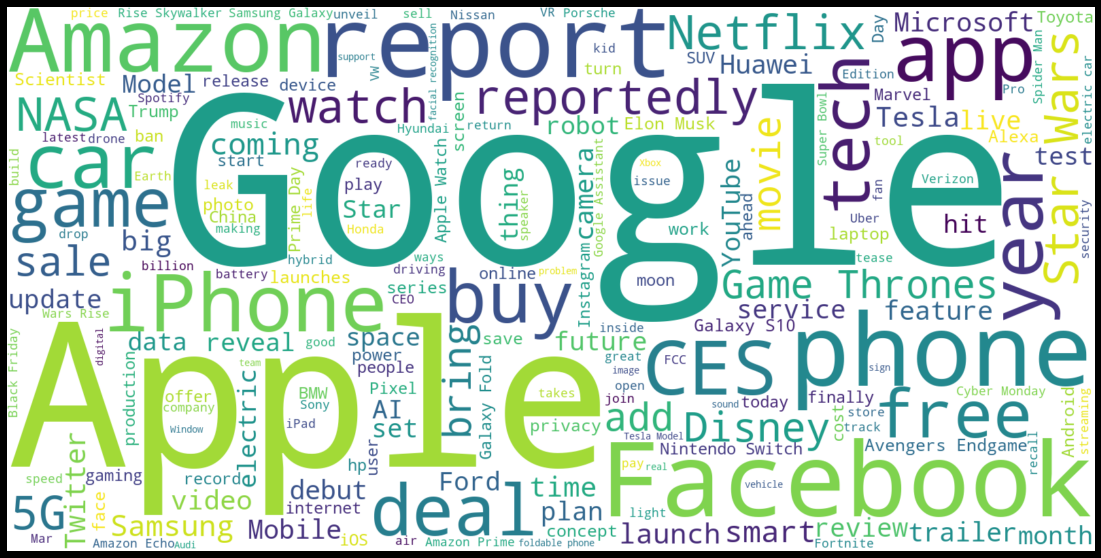

In [21]:
wordcloud = wc.generate(' '.join(df[df.published_date.dt.year==2019]['title'].apply(str)))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.tight_layout(pad=0)
# plt.show()
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')